In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [42]:
test_data = pd.read_csv('C:/Users/atalb/Documents/Coding/MLandAI/MLPracticeExercises/Datasets/StickerSales/test.csv')
train_data = pd.read_csv('C:/Users/atalb/Documents/Coding/MLandAI/MLPracticeExercises/Datasets/StickerSales/train.csv')

test_data.head()
# train_data.head()


,id,date,country,store,product
0,230130,2017-01-01,Canada,Discount Stickers,Holographic Goose
1,230131,2017-01-01,Canada,Discount Stickers,Kaggle
2,230132,2017-01-01,Canada,Discount Stickers,Kaggle Tiers
3,230133,2017-01-01,Canada,Discount Stickers,Kerneler
4,230134,2017-01-01,Canada,Discount Stickers,Kerneler Dark Mode


In [43]:
train_data.describe()

,id,num_sold
count,230130.000000,221259.000000
mean,115064.500000,752.527382
std,66432.953062,690.165445
min,0.000000,5.000000
25%,57532.250000,219.000000
50%,115064.500000,605.000000
75%,172596.750000,1114.000000
max,230129.000000,5939.000000


In [44]:

train_data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230130 entries, 0 to 230129
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   id        230130 non-null  int64  
 1   date      230130 non-null  object 
 2   country   230130 non-null  object 
 3   store     230130 non-null  object 
 4   product   230130 non-null  object 
 5   num_sold  221259 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 10.5+ MB


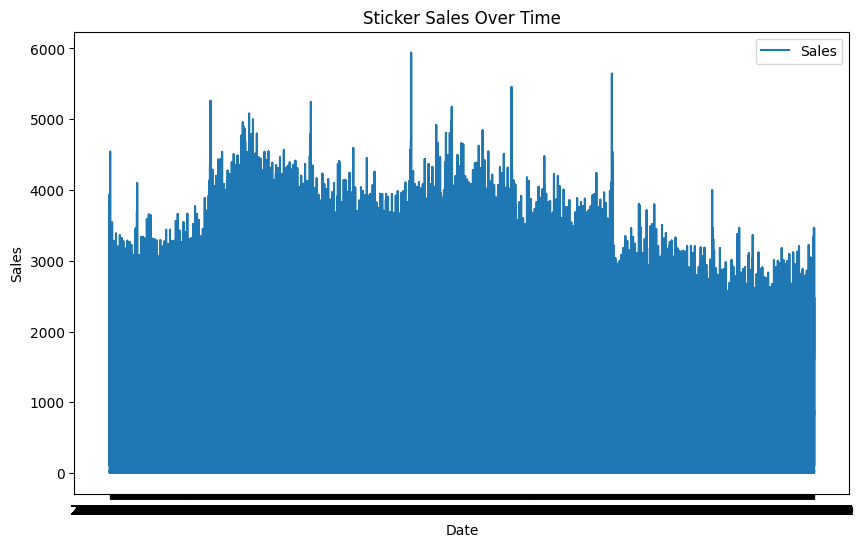

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(train_data['date'], train_data['num_sold'], label='Sales')
plt.title('Sticker Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [46]:
train_data.isnull().sum()


id             0
date           0
country        0
store          0
product        0
num_sold    8871
dtype: int64

In [47]:
train_data.dropna(inplace=True)
train_data.isnull().sum()



id          0
date        0
country     0
store       0
product     0
num_sold    0
dtype: int64

In [48]:
train_data['date'] = pd.to_datetime(train_data['date'])
print(train_data.dtypes)

id                   int64
date        datetime64[ns]
country             object
store               object
product             object
num_sold           float64
dtype: object


In [49]:
train_data['year'] = train_data['date'].dt.year
train_data['month'] = train_data['date'].dt.month
train_data['day'] = train_data['date'].dt.day
train_data['day_of_week'] = train_data['date'].dt.dayofweek  # 0 = Monday, 6 = Sunday
train_data['day_of_year'] = train_data['date'].dt.dayofyear
train_data['week_of_year'] = train_data['date'].dt.isocalendar().week
train_data['quarter'] = train_data['date'].dt.quarter

In [50]:
# Add cyclic features for 'day_of_week' (0-6)
train_data['day_of_week_sin'] = np.sin(2 * np.pi * train_data['day_of_week'] / 7)
train_data['day_of_week_cos'] = np.cos(2 * np.pi * train_data['day_of_week'] / 7)

# Add cyclic features for 'month' (1-12)
train_data['month_sin'] = np.sin(2 * np.pi * train_data['month'] / 12)
train_data['month_cos'] = np.cos(2 * np.pi * train_data['month'] / 12)

In [51]:
# Days since the start date
train_data['days_since_start'] = (train_data['date'] - train_data['date'].min()).dt.days

# Lag features
train_data['lag_1'] = train_data['days_since_start'].shift(1)  # 1-day lag

In [52]:
def get_season(month):
    if month in [12, 1, 2]: return 'Winter'
    elif month in [3, 4, 5]: return 'Spring'
    elif month in [6, 7, 8]: return 'Summer'
    else: return 'Fall'

train_data['season'] = train_data['month'].apply(get_season)

In [53]:

train_data.shape

(221259, 20)

In [54]:
test_data['date'] = pd.to_datetime(test_data['date'])
print(test_data.dtypes)

id                  int64
date       datetime64[ns]
country            object
store              object
product            object
dtype: object


In [55]:
test_data['year'] = test_data['date'].dt.year
test_data['month'] = test_data['date'].dt.month
test_data['day'] = test_data['date'].dt.day
test_data['day_of_week'] = test_data['date'].dt.dayofweek  # 0 = Monday, 6 = Sunday
test_data['day_of_year'] = test_data['date'].dt.dayofyear
test_data['week_of_year'] = test_data['date'].dt.isocalendar().week
test_data['quarter'] = test_data['date'].dt.quarter

In [56]:
# Add cyclic features for 'day_of_week' (0-6)
test_data['day_of_week_sin'] = np.sin(2 * np.pi * test_data['day_of_week'] / 7)
test_data['day_of_week_cos'] = np.cos(2 * np.pi * test_data['day_of_week'] / 7)

# Add cyclic features for 'month' (1-12)
test_data['month_sin'] = np.sin(2 * np.pi * test_data['month'] / 12)
test_data['month_cos'] = np.cos(2 * np.pi * test_data['month'] / 12)

In [57]:
# Days since the start date
test_data['days_since_start'] = (test_data['date'] - test_data['date'].min()).dt.days

# Lag features
test_data['lag_1'] = test_data['days_since_start'].shift(1)  # 1-day lag

In [58]:
def get_season(month):
    if month in [12, 1, 2]: return 'Winter'
    elif month in [3, 4, 5]: return 'Spring'
    elif month in [6, 7, 8]: return 'Summer'
    else: return 'Fall'

test_data['season'] = test_data['month'].apply(get_season)

In [59]:
# # Rolling mean and cumulative mean for training data
# train_data['rolling_mean'] = train_data['num_sold'].rolling(window=7, min_periods=1).mean()
# train_data['cumulative_mean'] = train_data['num_sold'].expanding().mean()


In [60]:
# # Concatenate training and test data
# combined_df = pd.concat([train_data, test_data], axis=0)
# combined_df['rolling_mean'] = combined_df['num_sold'].rolling(window=7, min_periods=1).mean()
# combined_df['cumulative_mean'] = combined_df['num_sold'].expanding().mean()


In [61]:
# train_data = combined_df.loc[train_data.index]
# test_data = combined_df.loc[test_data.index]


In [62]:
# combined_df.shape

In [63]:
test_data.index

RangeIndex(start=0, stop=98550, step=1)

In [64]:
train_data.index

Index([     1,      2,      3,      4,      5,      6,      7,      8,      9,
           10,
       ...
       230120, 230121, 230122, 230123, 230124, 230125, 230126, 230127, 230128,
       230129],
      dtype='int64', length=221259)

In [65]:
train_data.shape
# test_data.shape


(221259, 20)

In [66]:

train_data.head()


,id,date,country,store,product,num_sold,year,month,day,day_of_week,day_of_year,week_of_year,quarter,day_of_week_sin,day_of_week_cos,month_sin,month_cos,days_since_start,lag_1,season
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0,2010,1,1,4,1,53,1,-0.433884,-0.900969,0.5,0.866025,0,NaN,Winter
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0,2010,1,1,4,1,53,1,-0.433884,-0.900969,0.5,0.866025,0,0.0,Winter
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0,2010,1,1,4,1,53,1,-0.433884,-0.900969,0.5,0.866025,0,0.0,Winter
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0,2010,1,1,4,1,53,1,-0.433884,-0.900969,0.5,0.866025,0,0.0,Winter
5,5,2010-01-01,Canada,Stickers for Less,Holographic Goose,300.0,2010,1,1,4,1,53,1,-0.433884,-0.900969,0.5,0.866025,0,0.0,Winter


In [67]:
test_data.head()


,id,date,country,store,product,year,month,day,day_of_week,day_of_year,week_of_year,quarter,day_of_week_sin,day_of_week_cos,month_sin,month_cos,days_since_start,lag_1,season
0,230130,2017-01-01,Canada,Discount Stickers,Holographic Goose,2017,1,1,6,1,52,1,-0.781831,0.62349,0.5,0.866025,0,NaN,Winter
1,230131,2017-01-01,Canada,Discount Stickers,Kaggle,2017,1,1,6,1,52,1,-0.781831,0.62349,0.5,0.866025,0,0.0,Winter
2,230132,2017-01-01,Canada,Discount Stickers,Kaggle Tiers,2017,1,1,6,1,52,1,-0.781831,0.62349,0.5,0.866025,0,0.0,Winter
3,230133,2017-01-01,Canada,Discount Stickers,Kerneler,2017,1,1,6,1,52,1,-0.781831,0.62349,0.5,0.866025,0,0.0,Winter
4,230134,2017-01-01,Canada,Discount Stickers,Kerneler Dark Mode,2017,1,1,6,1,52,1,-0.781831,0.62349,0.5,0.866025,0,0.0,Winter


In [68]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Create label encoders for each categorical column
le_country = LabelEncoder()
le_store = LabelEncoder()
le_product = LabelEncoder()
le_season = LabelEncoder()

# Fit and transform categorical columns in train data
train_data['country_encoded'] = le_country.fit_transform(train_data['country'])
train_data['store_encoded'] = le_store.fit_transform(train_data['store'])
train_data['product_encoded'] = le_product.fit_transform(train_data['product'])
train_data['season_encoded'] = le_season.fit_transform(train_data['season'])

# Transform categorical columns in test data using the same encoders
test_data['country_encoded'] = le_country.transform(test_data['country'])
test_data['store_encoded'] = le_store.transform(test_data['store'])
test_data['product_encoded'] = le_product.transform(test_data['product'])
test_data['season_encoded'] = le_season.transform(test_data['season'])

# Convert date column to datetime type and extract useful features
# train_data['date'] = pd.to_datetime(train_data['date'])
# test_data['date'] = pd.to_datetime(test_data['date'])

# # Extract date features
# for df in [train_data, test_data]:
#     df['year'] = df['date'].dt.year
#     df['month'] = df['date'].dt.month
#     df['day'] = df['date'].dt.day
#     df['day_of_week'] = df['date'].dt.dayofweek

# Display the first few rows of encoded train data
train_data.head()

,id,date,country,store,product,num_sold,year,month,day,day_of_week,...,day_of_week_cos,month_sin,month_cos,days_since_start,lag_1,season,country_encoded,store_encoded,product_encoded,season_encoded
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0,2010,1,1,4,...,-0.900969,0.5,0.866025,0,NaN,Winter,0,0,1,3
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0,2010,1,1,4,...,-0.900969,0.5,0.866025,0,0.0,Winter,0,0,2,3
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0,2010,1,1,4,...,-0.900969,0.5,0.866025,0,0.0,Winter,0,0,3,3
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0,2010,1,1,4,...,-0.900969,0.5,0.866025,0,0.0,Winter,0,0,4,3
5,5,2010-01-01,Canada,Stickers for Less,Holographic Goose,300.0,2010,1,1,4,...,-0.900969,0.5,0.866025,0,0.0,Winter,0,2,0,3


In [69]:
test_data.head()

,id,date,country,store,product,year,month,day,day_of_week,day_of_year,...,day_of_week_cos,month_sin,month_cos,days_since_start,lag_1,season,country_encoded,store_encoded,product_encoded,season_encoded
0,230130,2017-01-01,Canada,Discount Stickers,Holographic Goose,2017,1,1,6,1,...,0.62349,0.5,0.866025,0,NaN,Winter,0,0,0,3
1,230131,2017-01-01,Canada,Discount Stickers,Kaggle,2017,1,1,6,1,...,0.62349,0.5,0.866025,0,0.0,Winter,0,0,1,3
2,230132,2017-01-01,Canada,Discount Stickers,Kaggle Tiers,2017,1,1,6,1,...,0.62349,0.5,0.866025,0,0.0,Winter,0,0,2,3
3,230133,2017-01-01,Canada,Discount Stickers,Kerneler,2017,1,1,6,1,...,0.62349,0.5,0.866025,0,0.0,Winter,0,0,3,3
4,230134,2017-01-01,Canada,Discount Stickers,Kerneler Dark Mode,2017,1,1,6,1,...,0.62349,0.5,0.866025,0,0.0,Winter,0,0,4,3


In [75]:
train_data.columns

Index(['id', 'num_sold', 'year', 'month', 'day', 'day_of_week', 'day_of_year',
       'week_of_year', 'quarter', 'day_of_week_sin', 'day_of_week_cos',
       'month_sin', 'month_cos', 'days_since_start', 'lag_1',
       'country_encoded', 'store_encoded', 'product_encoded',
       'season_encoded'],
      dtype='object')

In [70]:
# Drop original categorical columns from both datasets
columns_to_drop = ['country', 'store', 'product', 'date', 'season']

train_data = train_data.drop(columns=columns_to_drop)
test_data = test_data.drop(columns=columns_to_drop)

# Show the first few rows of the cleaned train data
train_data.head()

,id,num_sold,year,month,day,day_of_week,day_of_year,week_of_year,quarter,day_of_week_sin,day_of_week_cos,month_sin,month_cos,days_since_start,lag_1,country_encoded,store_encoded,product_encoded,season_encoded
1,1,973.0,2010,1,1,4,1,53,1,-0.433884,-0.900969,0.5,0.866025,0,NaN,0,0,1,3
2,2,906.0,2010,1,1,4,1,53,1,-0.433884,-0.900969,0.5,0.866025,0,0.0,0,0,2,3
3,3,423.0,2010,1,1,4,1,53,1,-0.433884,-0.900969,0.5,0.866025,0,0.0,0,0,3,3
4,4,491.0,2010,1,1,4,1,53,1,-0.433884,-0.900969,0.5,0.866025,0,0.0,0,0,4,3
5,5,300.0,2010,1,1,4,1,53,1,-0.433884,-0.900969,0.5,0.866025,0,0.0,0,2,0,3


In [71]:
train_data.shape
# test_data.shape

(221259, 19)

In [72]:
# test_data.head()
train_data.isnull().sum()


id                  0
num_sold            0
year                0
month               0
day                 0
day_of_week         0
day_of_year         0
week_of_year        0
quarter             0
day_of_week_sin     0
day_of_week_cos     0
month_sin           0
month_cos           0
days_since_start    0
lag_1               1
country_encoded     0
store_encoded       0
product_encoded     0
season_encoded      0
dtype: int64

In [73]:
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error, r2_score

# # Separate features and target
# X = train_data.drop(['id', 'num_sold'], axis=1)
# y = train_data['num_sold']

# # Split the data into training and validation sets
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# # Create and train the model
# dt_model = DecisionTreeRegressor(random_state=42)
# dt_model.fit(X_train, y_train)

# # Make predictions on validation set
# val_predictions = dt_model.predict(X_val)

# # Calculate performance metrics
# mse = mean_squared_error(y_val, val_predictions)
# rmse = np.sqrt(mse)
# r2 = r2_score(y_val, val_predictions)

# print(f'Validation RMSE: {rmse:.2f}')
# print(f'Validation R2 Score: {r2:.2f}')

# # Make predictions on test data
# X_test = test_data.drop(['id'], axis=1)
# test_predictions = dt_model.predict(X_test)

# # Add predictions to test data
# test_data['predicted_num_sold'] = test_predictions

# # Display first few predictions
# test_data[['id', 'predicted_num_sold']].head()

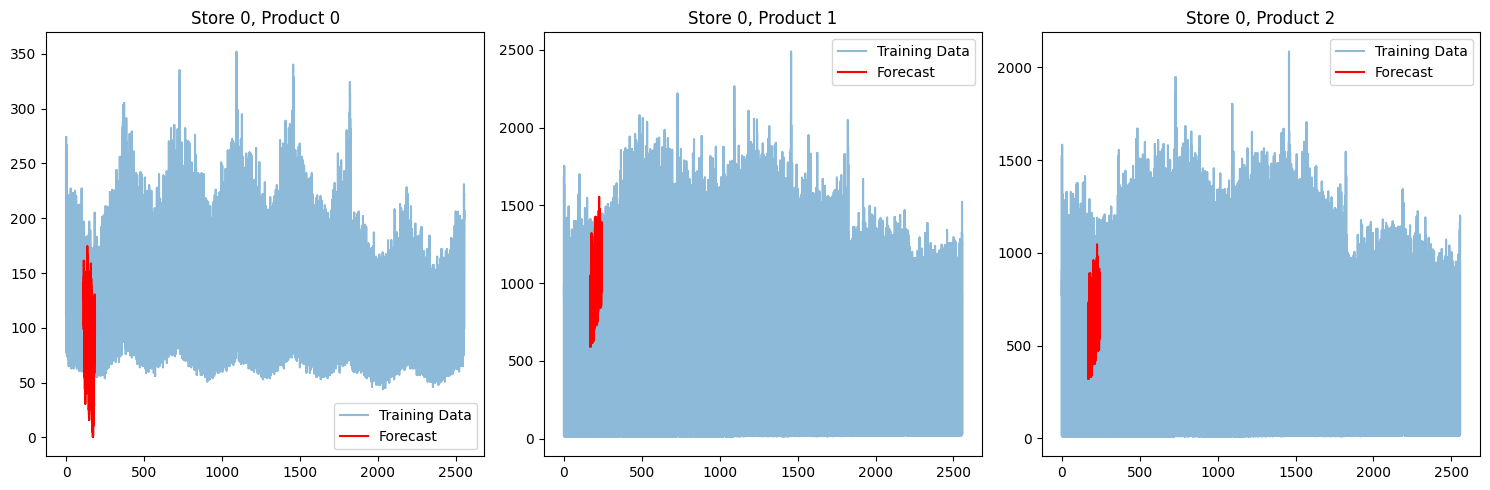

In [76]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings('ignore')

# Define features to use as exogenous variables
exog_features = [
    'month', 'day_of_week', 'quarter',
    'day_of_week_sin', 'day_of_week_cos',
    'month_sin', 'month_cos',
    'country_encoded', 'season_encoded'
]

# Create predictions DataFrame
test_pred = test_data[['id']].copy()
test_pred['predicted_num_sold'] = 0

# Group by store and product
store_product_groups = train_data.groupby(['store_encoded', 'product_encoded'])

# Train separate SARIMAX models for each store-product combination
for (store, product), group in store_product_groups:
    try:
        # Sort by days_since_start
        group = group.sort_values('days_since_start')
        
        # Prepare exogenous variables for training
        exog_train = group[exog_features]
        
        # Get test data for this store-product combination
        test_mask = (test_data['store_encoded'] == store) & (test_data['product_encoded'] == product)
        test_group = test_data[test_mask]
        
        if len(test_group) > 0:
            # Prepare exogenous variables for testing
            exog_test = test_group[exog_features]
            
            # Fit SARIMAX model
            # (1,1,1) for non-seasonal and (1,1,1,12) for seasonal components
            model = SARIMAX(group['num_sold'],
                          exog=exog_train,
                          order=(1, 1, 1),
                          seasonal_order=(1, 1, 1, 12),
                          enforce_stationarity=False,
                          enforce_invertibility=False)
            
            results = model.fit(disp=False)
            
            # Generate forecasts
            forecast = results.forecast(steps=len(test_group), exog=exog_test)
            
            # Update predictions in test_pred
            test_pred.loc[test_group.index, 'predicted_num_sold'] = forecast
            
    except Exception as e:
        # Fallback: use a simple average based on similar conditions
        print(f"Failed for store {store}, product {product}: {str(e)}")
        
        # Calculate mean sales based on similar conditions (month, day_of_week, season)
        for idx in test_data[test_mask].index:
            similar_conditions = train_data[
                (train_data['month'] == test_data.loc[idx, 'month']) &
                (train_data['day_of_week'] == test_data.loc[idx, 'day_of_week']) &
                (train_data['season_encoded'] == test_data.loc[idx, 'season_encoded']) &
                (train_data['store_encoded'] == store) &
                (train_data['product_encoded'] == product)
            ]
            test_pred.loc[idx, 'predicted_num_sold'] = similar_conditions['num_sold'].mean()
            if pd.isna(test_pred.loc[idx, 'predicted_num_sold']):
                test_pred.loc[idx, 'predicted_num_sold'] = group['num_sold'].mean()

# Ensure no negative predictions
test_pred['predicted_num_sold'] = test_pred['predicted_num_sold'].clip(lower=0)

# Save predictions
test_pred.to_csv('C:/Users/atalb/Documents/Coding/MLandAI/MLPracticeExercises/Datasets/StickerSales/test_pred_sarimax.csv', index=False)

# Plot examples
plt.figure(figsize=(15, 5))
for i, (store, product) in enumerate(list(store_product_groups.groups.keys())[:3]):
    plt.subplot(1, 3, i+1)
    
    # Get training data
    train_group = train_data[(train_data['store_encoded'] == store) & 
                            (train_data['product_encoded'] == product)]
    train_group = train_group.sort_values('days_since_start')
    
    # Get test predictions
    test_group = test_data[(test_data['store_encoded'] == store) & 
                          (test_data['product_encoded'] == product)]
    test_group = test_group.sort_values('days_since_start')
    
    # Plot
    plt.plot(train_group['days_since_start'], train_group['num_sold'], 
             label='Training Data', alpha=0.5)
    plt.plot(test_group['days_since_start'], 
             test_pred.loc[test_group.index, 'predicted_num_sold'],
             label='Forecast', color='red')
    plt.title(f'Store {store}, Product {product}')
    plt.legend()

plt.tight_layout()
plt.show()

In [33]:
test_pred = test_data[['id', 'predicted_num_sold']]

In [34]:
test_pred.to_csv('C:/Users/atalb/Documents/Coding/MLandAI/MLPracticeExercises/Datasets/StickerSales/test_pred_3.csv', index=False)